In [2]:
!pip install tensorflow

In [1]:
# import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define the paths to the train and test folders on your desktop
train_path = 'C:/Users/chand/Desktop/New folder/DeepLearning/Dataset/train'
test_path = 'C:/Users/chand/Desktop/New folder/DeepLearning/Dataset/test'

# define image and batch size
img_height, img_width = 28, 28
batch_size = 64

# create ImageDataGenerator objects for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

# create flow_from_directory generators for train and test datasets
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(img_height, img_width),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(img_height, img_width),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

# define the model architecture
model = keras.Sequential(
    [
        keras.Input(shape=(img_height, img_width, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(train_generator.num_classes, activation="softmax"),
    ]
)

# compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# train the model
# MODEL.summary

history = model.fit(train_generator, epochs=10, validation_data=test_generator)

# evaluate the model on test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("Test accuracy:", test_acc)


Found 17000 images belonging to 10 classes.
Found 2999 images belonging to 10 classes.
Epoch 1/10
266/266 [==============================] - 50s 181ms/step - loss: 1.0569 - accuracy: 0.6588 - val_loss: 0.2716 - val_accuracy: 0.9206
Epoch 2/10
266/266 [==============================] - 34s 127ms/step - loss: 0.5036 - accuracy: 0.8369 - val_loss: 0.1181 - val_accuracy: 0.9663
Epoch 3/10
266/266 [==============================] - 37s 140ms/step - loss: 0.3687 - accuracy: 0.8868 - val_loss: 0.1269 - val_accuracy: 0.9607
Epoch 4/10
266/266 [==============================] - 36s 135ms/step - loss: 0.3051 - accuracy: 0.9031 - val_loss: 0.0879 - val_accuracy: 0.9720
Epoch 5/10
266/266 [==============================] - 35s 133ms/step - loss: 0.2609 - accuracy: 0.9192 - val_loss: 0.0899 - val_accuracy: 0.9720
Epoch 6/10
266/266 [==============================] - 35s 132ms/step - loss: 0.2253 - accuracy: 0.9296 - val_loss: 0.0658 - val_accuracy: 0.9810
Epoch 7/10
266/266 [=======================

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

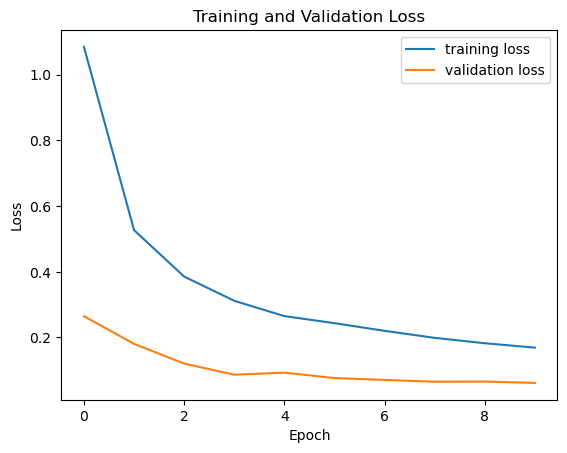

In [5]:
import matplotlib.pyplot as plt

# plot the training and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [10]:
# evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)

# print the test accuracy and loss
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


47/47 [==============================] - 3s 65ms/step - loss: 0.0425 - accuracy: 0.9883
Test accuracy: 0.9883294701576233
Test loss: 0.04250142723321915


In [ ]:
# lab 5

1/1 [==============================] - 0s 88ms/step


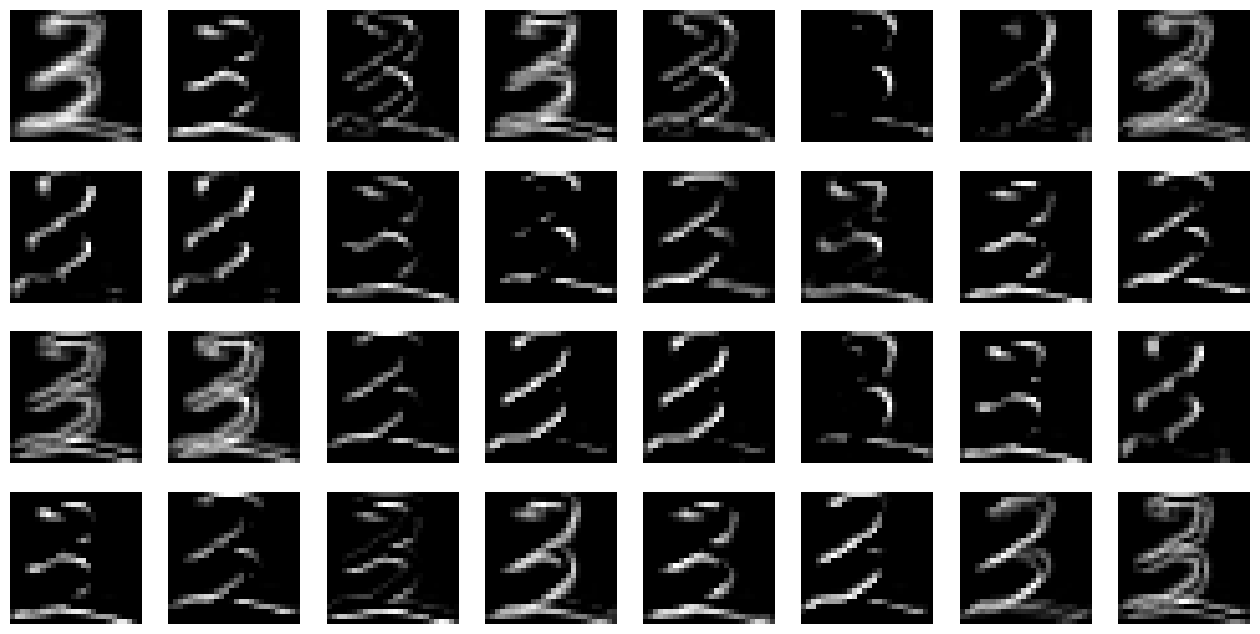

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# define a function to visualize the feature maps
def visualize_feature_maps(model, img_path, img_height, img_width):
    # load an image to use as input
    img = keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width), color_mode="grayscale")
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    # resize the input image to (28, 28)
    img_resized = tf.image.resize(img_array, size=(28, 28))

    # create a model to output the feature maps of the first convolutional layer
    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, keras.layers.Conv2D)]
    activation_model = keras.models.Model(inputs=model.inputs, outputs=layer_outputs)
    
    # get the feature maps of the first convolutional layer
    activations = activation_model.predict(img_resized)
    feature_maps = activations[0]

    # plot the feature maps
    fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
    for i in range(feature_maps.shape[-1]):
        row = i // 8
        col = i % 8
        axs[row][col].imshow(feature_maps[:, :, i], cmap="gray")
        axs[row][col].axis("off")
    plt.show()

# call the function with a sample image path
img_path ='C:/Users/chand/Desktop/5111.png'
img_height = 224
img_width = 224
visualize_feature_maps(model, img_path, img_height, img_width)
